In [19]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [39]:
lr = pd.read_csv("./presentation/stats/run_lr.csv")

In [35]:
psnr_tr = pd.read_csv("./presentation/stats/run_psnr_train.csv")

In [36]:
psnr_tr

,Wall time,Step,Value
0,1.638097e+09,0,41.139782
1,1.638098e+09,1,41.079063
2,1.638098e+09,2,41.734150
3,1.638099e+09,3,42.287098
4,1.638099e+09,4,42.410545
...,...,...,...
245,1.638255e+09,245,43.829960
246,1.638255e+09,246,43.826599
247,1.638256e+09,247,43.827690
248,1.638256e+09,248,43.829533


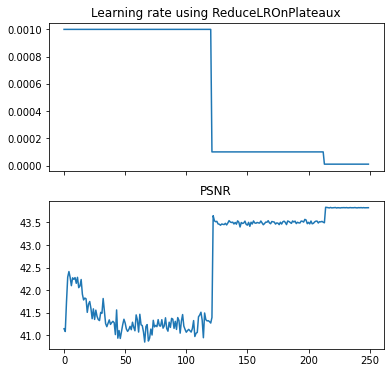

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

ax1.plot(lr["Step"], lr["Value"])
ax1.set_title('Learning rate using ReduceLROnPlateaux')

ax2.plot(psnr_tr["Step"], psnr_tr["Value"])
ax2.set_title('PSNR')

fig.savefig("./presentation/imgs/learning_rate.pdf", bbox_inches = 'tight', pad_inches = 0)